In [1]:
import sys
sys.path.append('../')
sys.path.append('../performance_tools/')

In [2]:
import os
import pickle
import json
import torch
from copy import deepcopy
from pytorch_nlp_models.text_pair.siamese_cnn import SiameseCNN
from utils.datasets import LCQMCDataset
from utils.model_utils import model_train, model_eval

from torch.utils.data import DataLoader
from dumb_containers import evaluate_performance

In [3]:
DATA_PATH = '../data/'
LCQMC_PATH = os.path.join(DATA_PATH, 'LCQMC')
WORD_VECTORS_PATH = os.path.join(DATA_PATH, 'word_vectors')
BAIDUBAIKE_PKL = os.path.join(WORD_VECTORS_PATH, 'baidubaike.pkl')

MAX_SEQ_LEN = 40

MODEL_PATH = os.path.join(DATA_PATH, 'model_files/siamese_cnn')
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)
    
MODEL_FILE = os.path.join(MODEL_PATH, 'model.pkl')

MODEL_CONFIG_JSON = os.path.join(MODEL_PATH, 'config.json')
with open(MODEL_CONFIG_JSON, 'r') as f:
    MODEL_CONFIG = json.load(f)

In [4]:
with open(BAIDUBAIKE_PKL, 'rb') as f:
    wvs = pickle.load(f)
    
wi = wvs['wi']
iw = wvs['iw']
dim = wvs['dim']
emb = wvs['emb']

In [5]:
dataset = LCQMCDataset(LCQMC_PATH, MAX_SEQ_LEN, wi, charmode = True)

In [6]:
def get_loader(dataset, mode, 
               batch_size = 32, 
               shuffle = False):
    _dataset = deepcopy(dataset)
    _dataset.to(mode)
    return DataLoader(_dataset, batch_size=batch_size, shuffle=shuffle)

In [7]:
test_loader = get_loader(dataset, 'test')

In [8]:
model = SiameseCNN(**MODEL_CONFIG)
checkpoint = torch.load(MODEL_FILE)
model.load_state_dict(checkpoint['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [9]:
data_ks, data_auc, data_probs, data_gts = model_eval(model, test_loader)

100%|██████████| 391/391 [00:06<00:00, 56.29it/s]


In [10]:
data_ks, data_auc

(0.69088, 0.9232402176)

KS=0.691, AUC=0.92, N=12500
At threshold=0.5, TPR=0.84, 5276 out of 6250
At threshold=0.5, FPR=0.16, 976 out of 6250
Ave_target: [0.0176 0.0568 0.1112 0.2088 0.3848 0.5816 0.7768 0.9136 0.9584 0.9904]
Ave_predicted: [0.21192671 0.72942013 0.9306798  0.98064142 0.99413985 0.99828064
 0.99944216 0.99979454 0.99992615 0.99998254]


../performance_tools/dumb_containers.py:378: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  maxind = plb.find(tpr-fpr == ks)
../performance_tools/dumb_containers.py:382: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  minind = plb.find(abs(cum_total - event_rate) == min(abs(cum_total - event_rate)))


0.69088

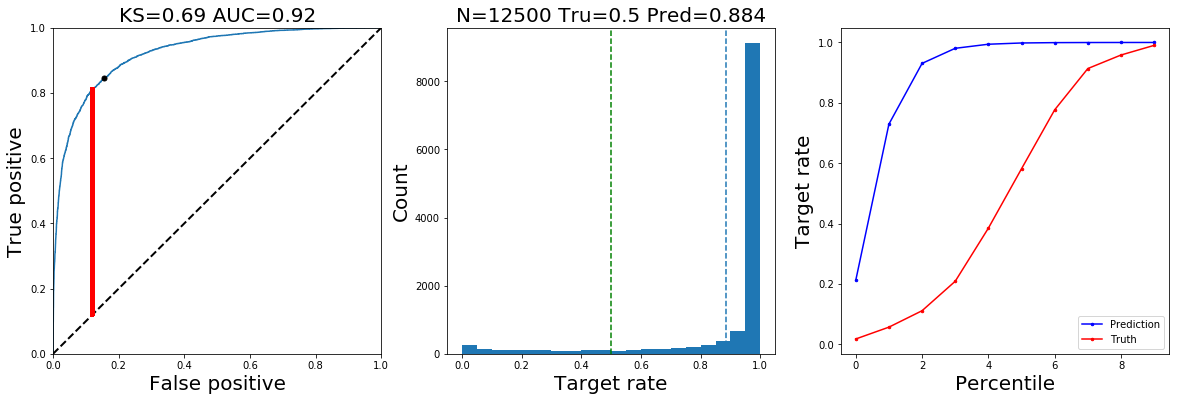

In [11]:
evaluate_performance(data_gts, data_probs)

In [12]:
for i, j in zip(data_probs, data_gts):
    print('{:.4f} -- {:d}'.format(i,j))

0.9780 -- 0
0.9999 -- 1
0.0231 -- 0
0.9998 -- 1
0.9670 -- 0
0.7013 -- 0
0.9995 -- 1
1.0000 -- 1
0.9998 -- 1
0.3166 -- 0
0.9999 -- 1
0.9999 -- 1
0.9940 -- 0
0.9999 -- 1
0.9995 -- 0
0.9989 -- 1
0.2222 -- 0
1.0000 -- 1
0.7596 -- 0
0.9891 -- 0
0.9999 -- 1
0.9900 -- 0
1.0000 -- 1
0.9518 -- 1
0.9548 -- 0
0.9990 -- 0
0.9999 -- 1
0.9681 -- 0
0.7763 -- 0
0.9930 -- 0
1.0000 -- 1
0.7304 -- 0
0.9998 -- 1
0.9998 -- 1
0.9999 -- 0
0.9008 -- 0
0.9997 -- 1
0.9965 -- 1
0.9900 -- 1
0.8355 -- 0
0.9992 -- 1
0.7550 -- 0
0.9114 -- 0
0.9999 -- 0
0.9999 -- 1
0.7085 -- 0
0.9999 -- 1
0.9979 -- 0
0.9958 -- 1
0.9981 -- 0
0.9980 -- 1
0.9998 -- 1
0.9999 -- 1
1.0000 -- 1
0.9999 -- 1
1.0000 -- 1
0.9994 -- 1
0.1135 -- 0
0.2923 -- 0
0.8161 -- 0
0.9999 -- 1
0.9828 -- 0
0.9991 -- 1
0.9996 -- 1
0.9997 -- 1
0.9970 -- 0
1.0000 -- 1
0.9995 -- 1
0.3220 -- 0
0.9999 -- 1
0.9999 -- 1
0.9997 -- 1
0.9673 -- 0
0.9975 -- 1
1.0000 -- 1
0.9893 -- 0
0.8960 -- 1
0.9997 -- 1
0.9999 -- 1
0.9983 -- 1
1.0000 -- 1
0.9998 -- 1
0.9975 -- 1
0.64

1.0000 -- 1
0.9654 -- 0
0.9997 -- 1
1.0000 -- 1
0.9999 -- 1
0.9996 -- 0
1.0000 -- 1
0.9999 -- 1
0.9999 -- 1
0.9999 -- 1
0.6154 -- 0
0.9906 -- 1
1.0000 -- 1
0.9999 -- 1
0.9503 -- 0
0.9987 -- 1
0.9981 -- 1
0.9381 -- 0
1.0000 -- 1
0.9998 -- 0
0.9552 -- 0
0.9977 -- 0
0.9247 -- 1
0.8057 -- 0
0.9990 -- 0
0.9910 -- 0
0.9989 -- 0
0.9999 -- 1
0.7715 -- 0
1.0000 -- 1
0.9986 -- 1
0.9981 -- 1
0.9995 -- 1
0.9998 -- 1
0.9943 -- 0
0.9898 -- 0
0.9996 -- 0
0.9999 -- 1
0.9893 -- 1
0.9998 -- 1
0.9999 -- 1
0.9475 -- 0
0.9851 -- 0
0.9996 -- 1
0.9983 -- 0
0.9970 -- 0
0.9992 -- 1
0.9978 -- 1
0.9974 -- 1
0.9995 -- 1
0.1022 -- 0
0.0906 -- 0
0.2289 -- 0
0.9990 -- 1
0.9982 -- 1
0.9789 -- 1
0.9992 -- 1
0.9957 -- 0
0.9999 -- 1
0.9993 -- 0
0.9998 -- 1
0.9998 -- 1
0.8639 -- 0
0.9977 -- 0
0.4393 -- 0
1.0000 -- 1
0.9990 -- 1
0.8422 -- 0
0.9999 -- 1
0.9967 -- 1
0.9644 -- 0
0.9989 -- 1
0.0147 -- 0
0.9998 -- 1
1.0000 -- 1
0.7500 -- 1
0.9334 -- 1
0.9994 -- 0
0.5884 -- 0
0.9303 -- 0
0.9998 -- 1
0.4462 -- 0
0.9778 -- 0
0.99

1.0000 -- 1
0.9116 -- 0
0.9691 -- 0
0.3955 -- 0
0.3332 -- 0
0.9999 -- 1
1.0000 -- 1
0.9995 -- 0
0.9998 -- 1
0.5197 -- 0
0.9939 -- 0
0.6236 -- 0
0.9887 -- 1
0.9998 -- 1
0.9999 -- 1
0.9985 -- 1
0.9998 -- 1
0.6173 -- 0
0.1111 -- 0
0.1688 -- 1
0.9998 -- 1
1.0000 -- 1
0.9766 -- 0
0.1672 -- 0
1.0000 -- 1
0.9988 -- 0
0.5136 -- 1
0.9911 -- 0
0.9975 -- 0
0.9338 -- 1
0.8653 -- 0
0.8478 -- 0
0.3144 -- 0
0.9667 -- 0
0.9977 -- 0
0.9994 -- 0
1.0000 -- 1
0.9807 -- 0
0.8663 -- 0
0.9999 -- 1
0.8969 -- 0
0.9969 -- 1
0.9441 -- 0
0.9976 -- 0
0.9618 -- 0
0.9632 -- 0
0.9547 -- 0
0.9993 -- 1
0.9990 -- 1
0.9662 -- 0
0.9996 -- 1
0.7339 -- 0
0.9973 -- 0
0.9999 -- 1
0.1701 -- 0
0.2188 -- 0
0.1527 -- 0
1.0000 -- 1
1.0000 -- 1
0.0716 -- 0
0.9998 -- 1
0.9959 -- 0
1.0000 -- 1
0.9985 -- 1
0.9561 -- 1
0.9997 -- 1
0.9990 -- 1
0.9997 -- 1
0.9998 -- 1
0.6307 -- 0
0.9986 -- 1
0.9999 -- 1
0.3488 -- 0
0.9956 -- 0
0.9999 -- 1
0.9999 -- 1
0.9999 -- 1
0.9997 -- 1
0.5656 -- 0
0.9994 -- 1
0.9767 -- 0
1.0000 -- 1
0.9850 -- 0
0.99

0.9933 -- 1
0.9996 -- 1
0.9844 -- 0
0.3260 -- 0
0.9989 -- 1
0.9993 -- 1
0.9984 -- 0
0.9946 -- 0
0.0395 -- 0
0.5429 -- 0
0.9877 -- 1
0.8579 -- 0
0.9997 -- 1
0.9997 -- 1
0.9996 -- 1
1.0000 -- 1
0.9988 -- 1
0.9977 -- 0
0.2406 -- 1
0.9966 -- 0
0.9994 -- 1
1.0000 -- 1
0.9995 -- 1
0.2311 -- 0
0.9924 -- 0
0.6982 -- 0
0.9993 -- 1
0.9985 -- 1
0.9995 -- 1
0.9991 -- 1
0.0042 -- 0
0.9998 -- 1
0.9969 -- 1
0.9892 -- 0
0.9992 -- 0
0.9879 -- 0
0.9999 -- 1
0.9486 -- 0
0.9997 -- 1
0.6088 -- 0
0.9397 -- 0
0.9924 -- 0
0.9970 -- 1
0.9415 -- 0
0.9848 -- 0
0.4121 -- 0
0.9998 -- 1
0.9992 -- 0
0.9978 -- 1
0.9999 -- 1
0.8759 -- 0
0.9999 -- 1
0.9978 -- 1
0.9974 -- 0
1.0000 -- 1
0.8166 -- 0
0.9627 -- 1
0.6309 -- 0
0.9980 -- 0
0.9919 -- 0
0.9985 -- 1
0.8910 -- 0
0.9343 -- 0
0.9930 -- 1
0.9998 -- 0
0.9999 -- 1
0.9995 -- 1
0.9992 -- 1
0.9629 -- 1
0.8149 -- 0
0.5630 -- 0
1.0000 -- 1
0.9694 -- 0
0.9294 -- 0
0.9992 -- 1
0.9981 -- 0
0.9999 -- 1
0.9698 -- 0
0.9958 -- 1
0.9977 -- 0
0.9992 -- 1
0.9999 -- 1
1.0000 -- 1
1.00

In [13]:
data_gts

array([0, 1, 0, ..., 1, 0, 1])